In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
def cmp_to_key(mycmp):
    'Convert a cmp= function into a key= function'
    class K(object):
        def __init__(self, obj, *args):
            self.obj = obj
        def __lt__(self, other):
            return mycmp(self.obj, other.obj) < 0
        def __gt__(self, other):
            return mycmp(self.obj, other.obj) > 0
        def __eq__(self, other):
            return mycmp(self.obj, other.obj) == 0
        def __le__(self, other):
            return mycmp(self.obj, other.obj) <= 0
        def __ge__(self, other):
            return mycmp(self.obj, other.obj) >= 0
        def __ne__(self, other):
            return mycmp(self.obj, other.obj) != 0
    return K
def contour_sort(a, b):

    br_a = cv2.boundingRect(a)
    br_b = cv2.boundingRect(b)

    if abs(br_a[1] - br_b[1]) <= 15:
        return br_a[0] - br_b[0]

    return br_a[1] - br_b[1]

image = cv2.imread('/content/1.png')
image_shape = image.shape[:2]
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 25), 0)

edged = cv2.Canny(blurred, 100, 150)

kernel = np.ones((2,32), np.uint8)
#kernel = cv2.getStructuringElement(cv2.ADAPTIVE_THRESH_GAUSSIAN_C, ksize=(2*w, 1))
dilated = cv2.dilate(edged, kernel, iterations = 1)

cnts = cv2.findContours(dilated, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[0]


In [ ]:
from google.colab.patches import cv2_imshow

cnts = sorted(cnts, key=cmp_to_key(contour_sort))
for j in range(0,len(cnts)):
  x, y, w, h = cv2.boundingRect(cnts[j])

  # Getting ROI
  roi = image[y:y+h, x:x+w]

  # show ROI
  cv2_imshow(roi)
  #cv2.rectangle(img,(x,y),( x + w, y + h ),(90,0,255),2)


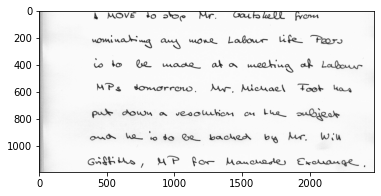

In [ ]:
plt.imshow(image)

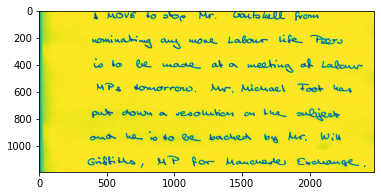

In [ ]:
plt.imshow(gray)

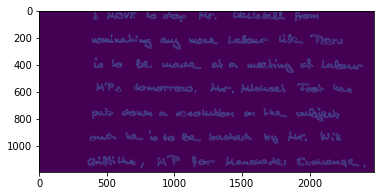

In [ ]:
plt.imshow(edged)

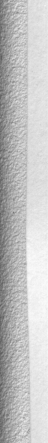

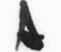

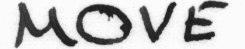

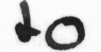

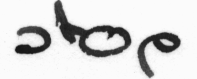

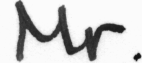

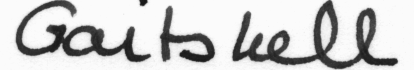

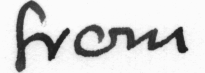

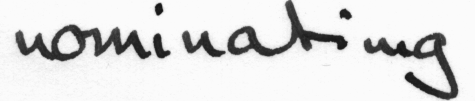

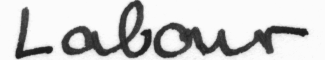

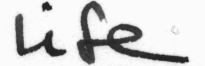

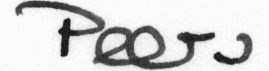

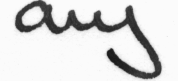

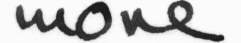

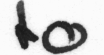

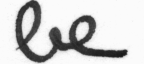

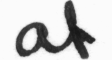

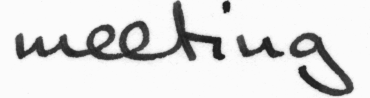

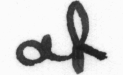

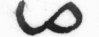

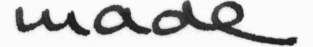

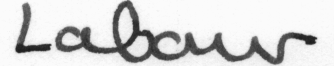

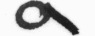

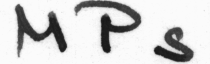

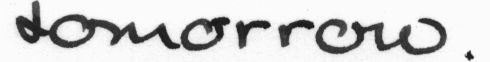

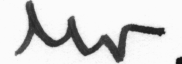

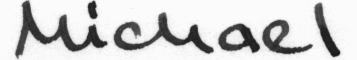

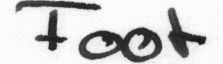

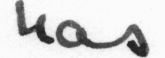

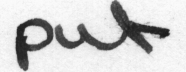

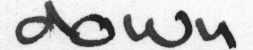

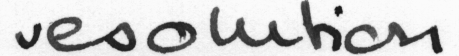

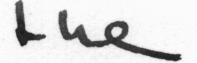

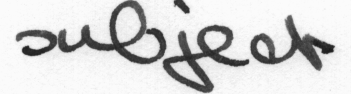

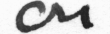

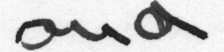

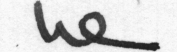

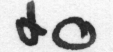

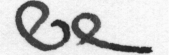

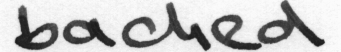

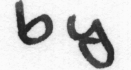

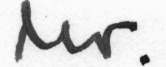

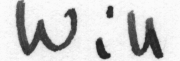

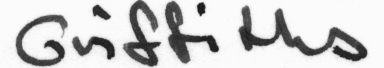

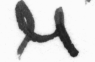

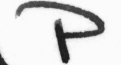

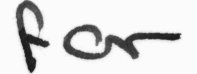

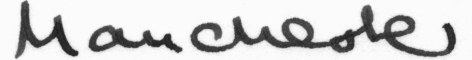

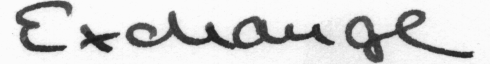

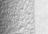

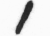